In [46]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime



In [48]:
file_path = "/home/lydia/Downloads/raw_analyst_ratings.csv"
data = pd.read_csv(file_path)
#data['date'] = pd.to_datetime(data['date'], format='mixed')  # Pandas will infer the format
#data.set_index('Date', inplace=True)
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [36]:
daily_Headlines = data.groupby('date').size().reset_index(name='headlines_count')
time_series_data = pd.DataFrame({
    'Date': daily_Headlines['date'],
    'headlines_count': daily_Headlines['headlines_count']
})
time_series_data.set_index('Date', inplace=True)

In [ ]:
time_series_data.head()


,headlines_count
Date,
2009-02-14 00:00:00,1
2009-04-27 00:00:00,2
2009-04-29 00:00:00,1
2009-05-22 00:00:00,1
2009-05-27 00:00:00,6


<Figure size 1200x800 with 0 Axes>

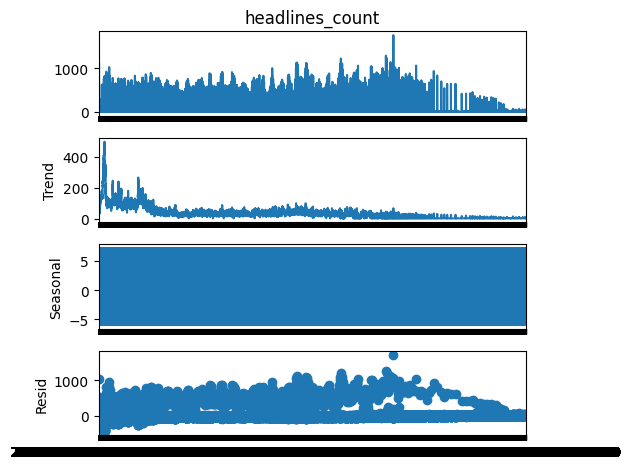

In [47]:
decomposition = seasonal_decompose(time_series_data['headlines_count'], model='additive', period=30)
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()